In [1]:
import numpy as np 
import pandas as pd 
import os, sys
import matplotlib.pyplot as plt
from pylab import rcParams

from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import confusion_matrix 
#from sklearn.externals import joblib
import joblib
 
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [2]:
training_file_location = os.path.join(os.environ["PWD"], '../dataset/FaultDetectionFeatures', 'fft-windowsize-128.csv')

training_dataset = pd.read_csv(training_file_location)
print(len(training_dataset), type(training_dataset))
factor = pd.factorize(training_dataset.iloc[:, -1].values) 
encoding = factor[0] 
symbols = factor[1] 
print(symbols)

136348 <class 'pandas.core.frame.DataFrame'>
['Aout(Working)-FFT' 'Aout(Faulty)-FFT']


In [3]:
X = training_dataset.iloc[:,:-1].values
y = training_dataset.iloc[:, -1].values

# print(X)
# print(y)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 21) 
scaler = StandardScaler() 
X_train = scaler.fit_transform(X_train) 
X_test = scaler.transform(X_test)

In [5]:
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 20) 
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=20)

In [6]:
y_pred = classifier.predict(X_test)
print(accuracy_score(y_test, y_pred))

pd.crosstab(y_test, y_pred, normalize='index')
 
# reversefactor = dict(zip(range(513), symbols)) 
# y_test = np.vectorize(reversefactor.get)(y_test) 
# y_pred = np.vectorize(reversefactor.get)(y_pred)

# pd.crosstab(y_test, y_pred, rownames=['Actual status'], colnames=['Predicted status'])
#print(pd.crosstab(y_test, y_pred, rownames=['Actual status'], colnames=['Predicted status']))
 


0.9777975330592288


col_0,Aout(Faulty)-FFT,Aout(Working)-FFT
row_0,,
Aout(Faulty)-FFT,0.992133,0.007867
Aout(Working)-FFT,0.041255,0.958745


In [7]:
print(metrics.classification_report(y_test, y_pred))

                   precision    recall  f1-score   support

 Aout(Faulty)-FFT       0.97      0.99      0.98     25676
Aout(Working)-FFT       0.99      0.96      0.97     19319

         accuracy                           0.98     44995
        macro avg       0.98      0.98      0.98     44995
     weighted avg       0.98      0.98      0.98     44995



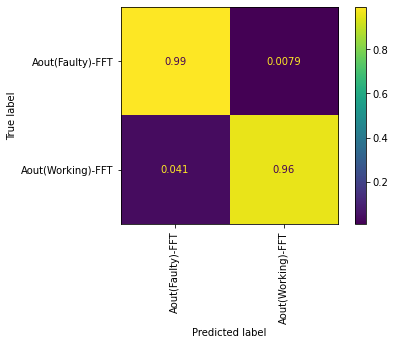

In [8]:
metrics.plot_confusion_matrix(classifier, X_test, y_test, xticks_rotation='vertical', normalize='true')